# Part 2: Exploring Playlist Data

Using the data extraction method in the previous part, I extract information from a set of 12 playlists of 98-100 (the maximum playlist size that Spotify API allows is 100) - 6 that I like and 6 that I don't. I then plot the data and explore patterns that could be useful to choose the right machine learning model.

## 1. Setting Up

Since I have a known, set number of playlists, I write the program to read exactly 12 playlists into a list of dataframes. I then concatenate the dataframes. Each playlist has its own set of indices, so the indices of the concatenated dataframe have duplicates and overlaps and they have to be reset.

In [139]:
import numpy as np
import pandas as pd

In [140]:
df_list = []
for i in range(0,12):
    filename = 'playlist' + str(i) + '.json'
    df_list.append(pd.read_json(filename))

songs = pd.concat(df_list)
songs = songs.reset_index()
songs.head()

,index,id,title,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,num_bars,num_sections,num_segments,class
0,0,5vYA1mW9g2Coh1HUFUSmlb,3AM,0.521,0.673,8,-8.685,1,0.005730,0.000000,0.1200,0.543,108.031,225947,4,100,8,830,1
1,1,2klCjJcucgGQysgH170npL,4 Walls,0.735,0.849,4,-4.308,0,0.212000,0.000029,0.0608,0.223,125.972,207477,4,107,7,999,1
2,10,7nT4rMprxiA9H9HM3oZ1Kq,Again,0.614,0.547,5,-11.772,0,0.767000,0.893000,0.0919,0.226,92.990,172000,4,65,8,698,1
3,11,1trFxVLL8WKhYap543e74l,Airplane pt.2,0.769,0.817,0,-4.092,0,0.026800,0.000099,0.0840,0.866,139.979,218615,4,125,10,921,1
4,12,2UM6b78kBrge7Esaoz93kk,Alejandro,0.623,0.793,11,-6.630,0,0.000397,0.001500,0.3750,0.360,98.998,274213,4,112,9,1137,1


I drop all the duplicates that may have come through from the playlists, and the redundant index column. I also drop the ID and title because they serve no purpose in looking for patterns and are just helpful when reading through the dataframe.

In [141]:
songs = songs.drop_duplicates()
songs = songs.drop('index', axis=1)
songs = songs.drop(['id', 'title'], axis=1)

In [142]:
songs.head()

,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,num_bars,num_sections,num_segments,class
0,0.521,0.673,8,-8.685,1,0.005730,0.000000,0.1200,0.543,108.031,225947,4,100,8,830,1
1,0.735,0.849,4,-4.308,0,0.212000,0.000029,0.0608,0.223,125.972,207477,4,107,7,999,1
2,0.614,0.547,5,-11.772,0,0.767000,0.893000,0.0919,0.226,92.990,172000,4,65,8,698,1
3,0.769,0.817,0,-4.092,0,0.026800,0.000099,0.0840,0.866,139.979,218615,4,125,10,921,1
4,0.623,0.793,11,-6.630,0,0.000397,0.001500,0.3750,0.360,98.998,274213,4,112,9,1137,1


## 2. Plotting Data

In [143]:
import matplotlib.pyplot as plt
import seaborn as sns

### 2.1. Pair Plots

I first do a pair plot with the hue set to 'class' to see if there are any obvious patterns that distinguish my taste. There seems to be some distinct features in the distribution plots, but the scatter plots have a lot of overlap and the classes are almost indistinguishable.

C:\Users\Simon\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Simon\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


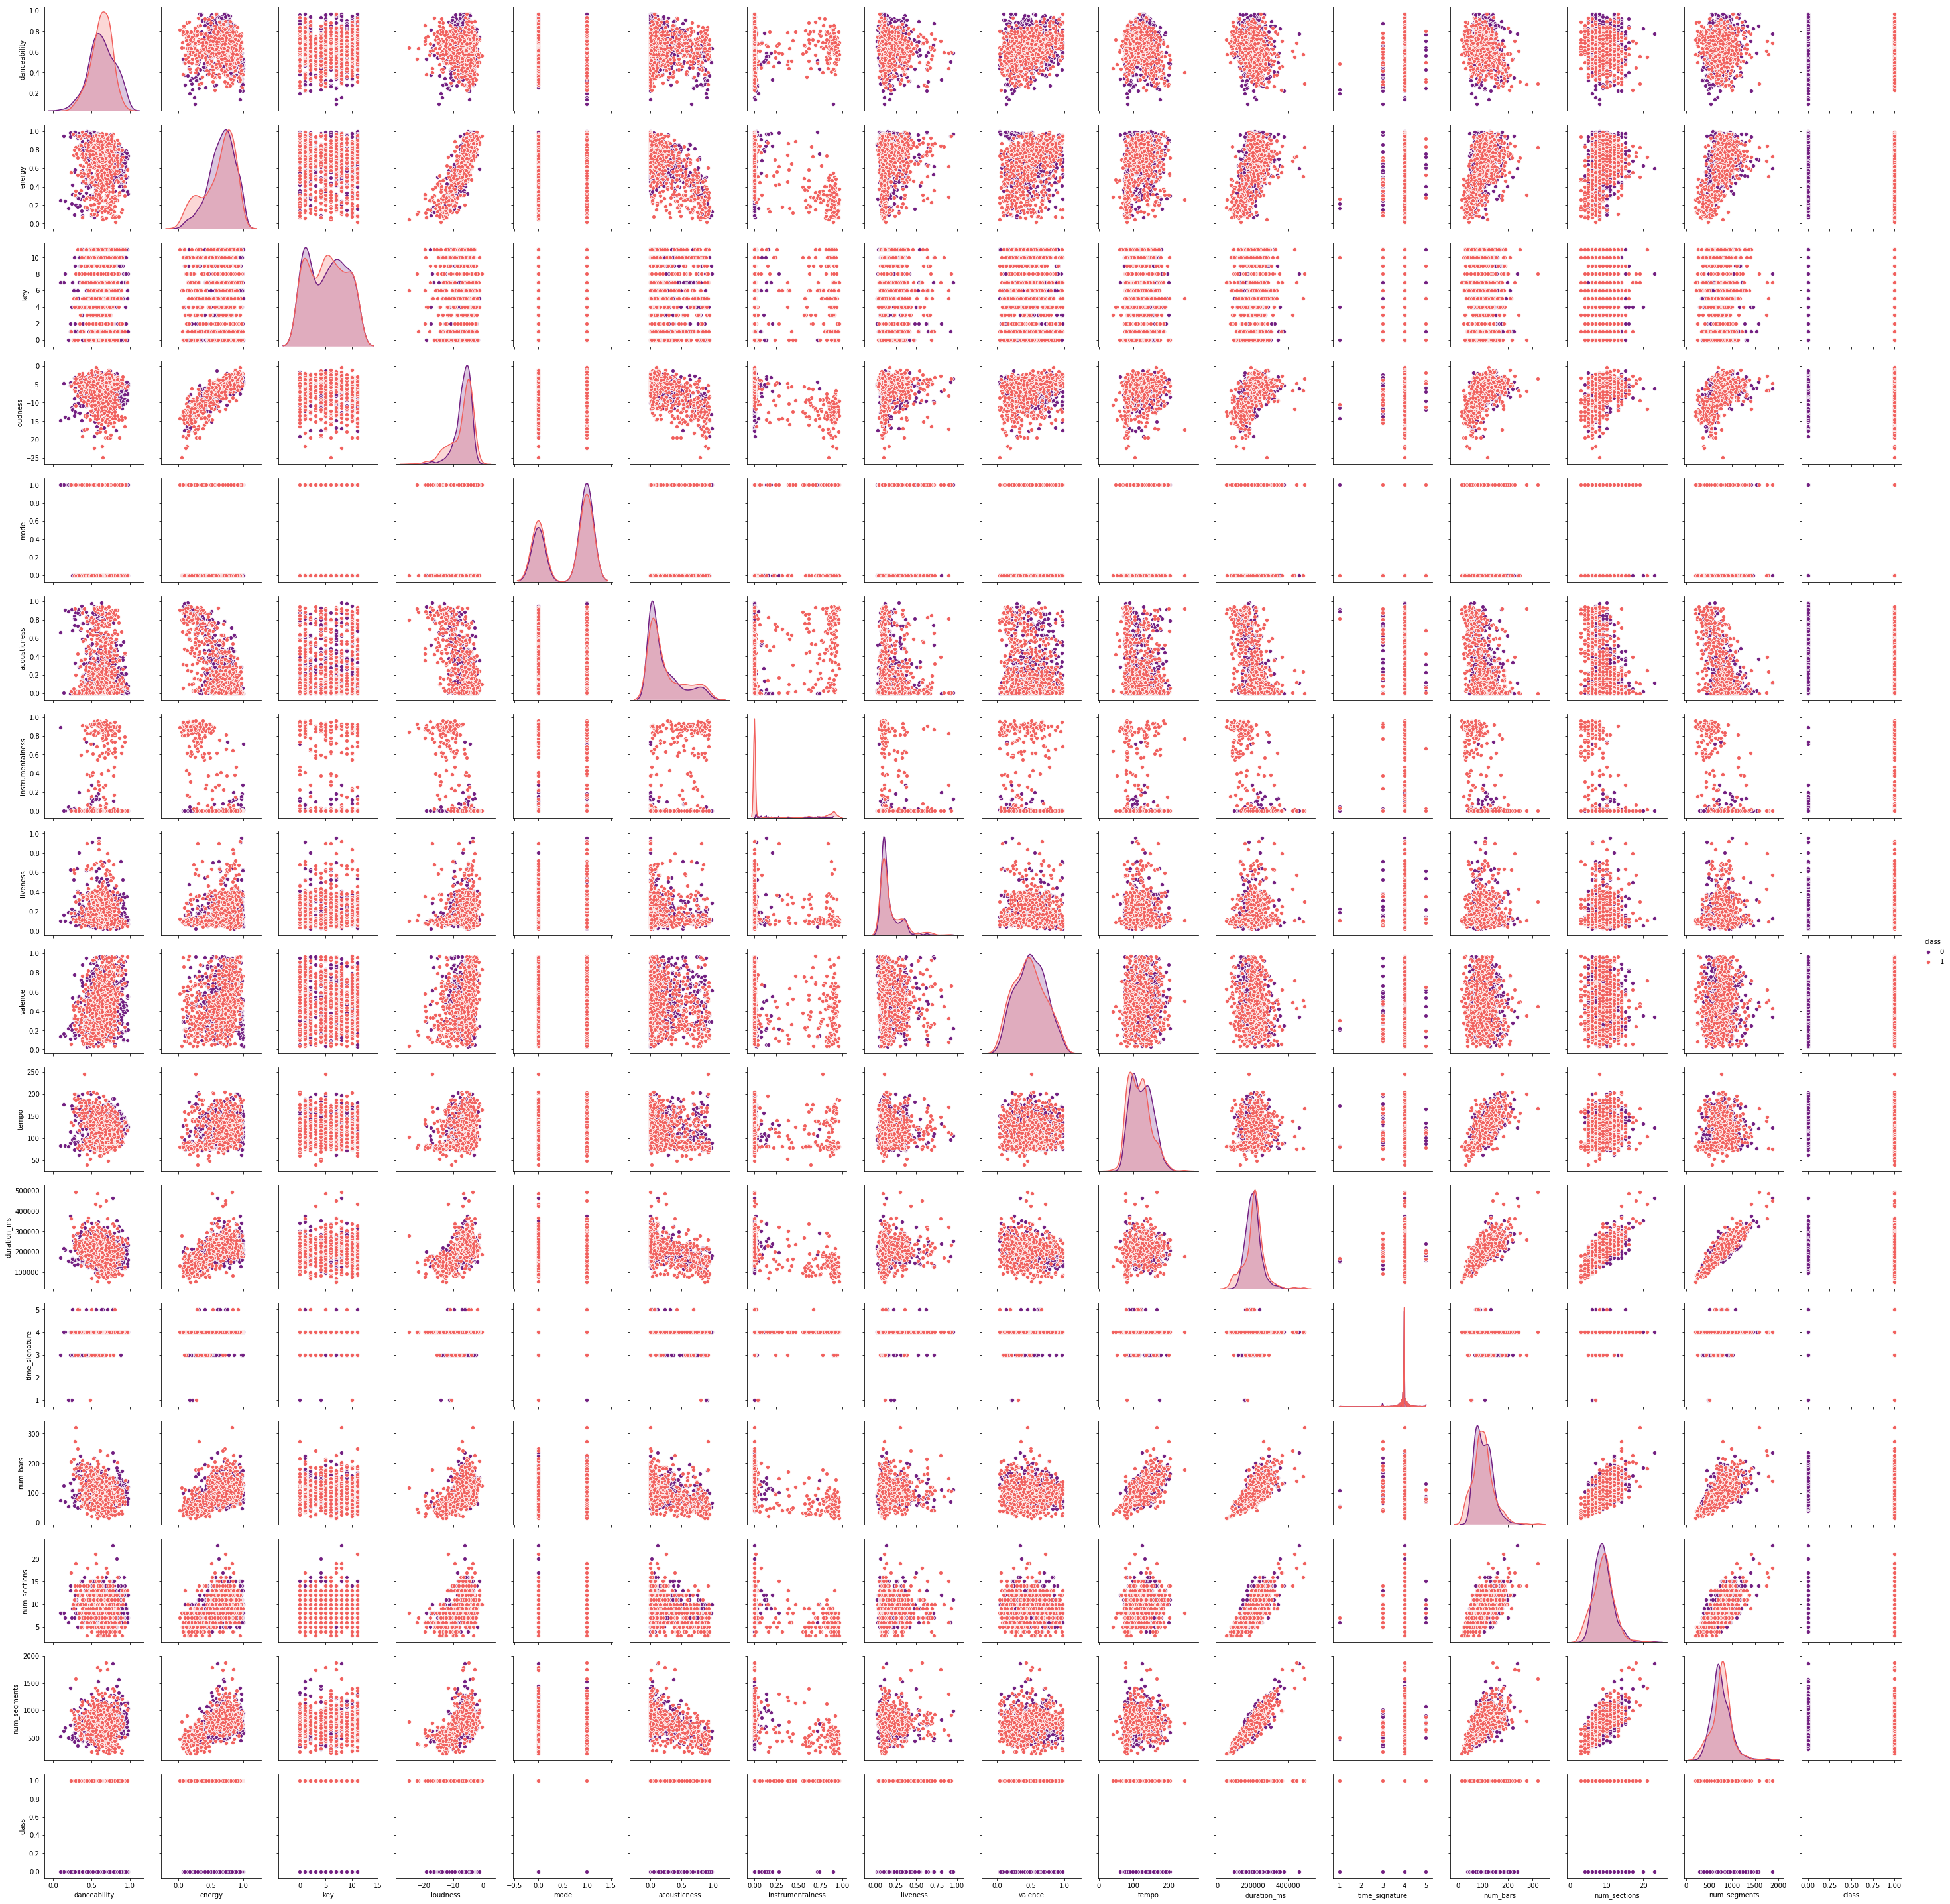

In [144]:
sns.pairplot(data=songs, hue='class', palette='magma')

### 2.2. Individual Distribution Plots

I plot the distribution plots individually in larger figures to try to notice any obvious patterns or interesting outliers.
The legend corresponds to the class, 1 being I like the song, 0 being I don't.

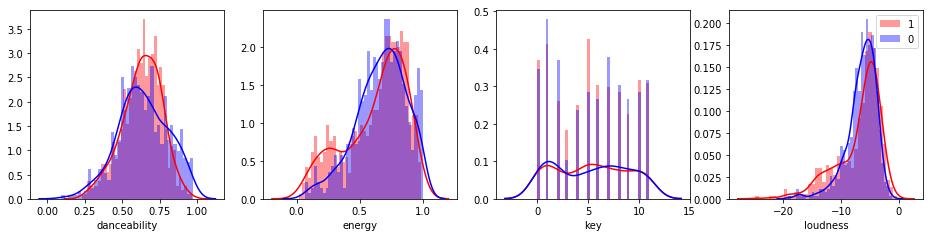

In [145]:
plt.figure(figsize=(16,16))
plt.subplot(4,4,1)
sns.distplot(songs[songs['class']==1]['danceability'], color='red', bins=40)
sns.distplot(songs[songs['class']==0]['danceability'], color='blue', bins=40)
plt.subplot(4,4,2)
sns.distplot(songs[songs['class']==1]['energy'], color='red', bins=40)
sns.distplot(songs[songs['class']==0]['energy'], color='blue', bins=40)
plt.subplot(4,4,3)
sns.distplot(songs[songs['class']==1]['key'], color='red', bins=40)
sns.distplot(songs[songs['class']==0]['key'], color='blue', bins=40)
plt.subplot(4,4,4)
sns.distplot(songs[songs['class']==1]['loudness'], color='red', bins=40)
sns.distplot(songs[songs['class']==0]['loudness'], color='blue', bins=40)
plt.legend((1,0))

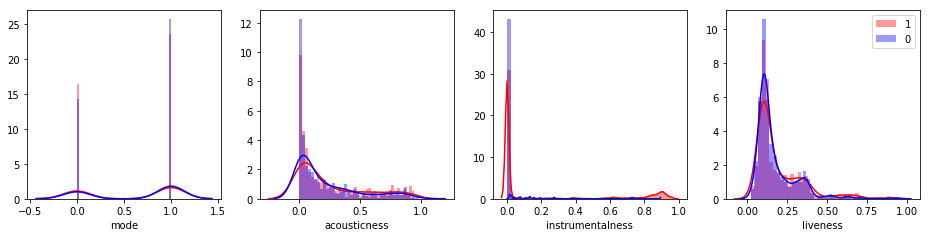

In [146]:
plt.figure(figsize=(16,16))
plt.subplot(4,4,1)
sns.distplot(songs[songs['class']==1]['mode'], color='red', bins=40)
sns.distplot(songs[songs['class']==0]['mode'], color='blue', bins=40)
plt.subplot(4,4,2)
sns.distplot(songs[songs['class']==1]['acousticness'], color='red', bins=40)
sns.distplot(songs[songs['class']==0]['acousticness'], color='blue', bins=40)
plt.subplot(4,4,3)
sns.distplot(songs[songs['class']==1]['instrumentalness'], color='red', bins=40)
sns.distplot(songs[songs['class']==0]['instrumentalness'], color='blue', bins=40)
plt.subplot(4,4,4)
sns.distplot(songs[songs['class']==1]['liveness'], color='red', bins=40)
sns.distplot(songs[songs['class']==0]['liveness'], color='blue', bins=40)
plt.legend((1,0))

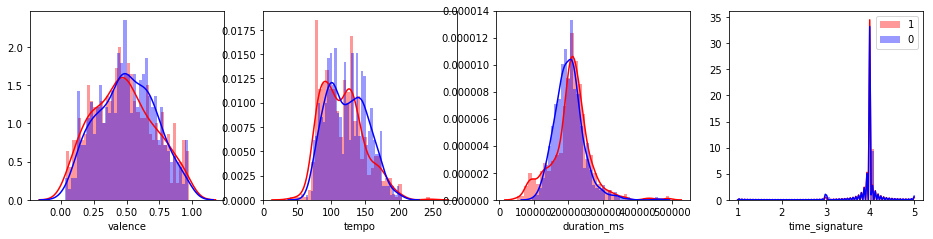

In [147]:
plt.figure(figsize=(16,16))
plt.subplot(4,4,1)
sns.distplot(songs[songs['class']==1]['valence'], color='red', bins=40)
sns.distplot(songs[songs['class']==0]['valence'], color='blue', bins=40)
plt.subplot(4,4,2)
sns.distplot(songs[songs['class']==1]['tempo'], color='red', bins=40)
sns.distplot(songs[songs['class']==0]['tempo'], color='blue', bins=40)
plt.subplot(4,4,3)
sns.distplot(songs[songs['class']==1]['duration_ms'], color='red', bins=40)
sns.distplot(songs[songs['class']==0]['duration_ms'], color='blue', bins=40)
plt.subplot(4,4,4)
sns.distplot(songs[songs['class']==1]['time_signature'], color='red', bins=40)
sns.distplot(songs[songs['class']==0]['time_signature'], color='blue', bins=40)
plt.legend((1,0))

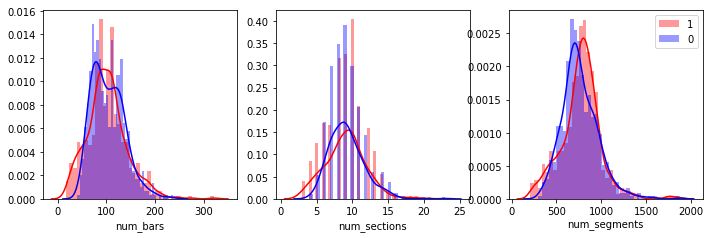

In [148]:
plt.figure(figsize=(16,16))
plt.subplot(4,4,1)
sns.distplot(songs[songs['class']==1]['num_bars'], color='red', bins=40)
sns.distplot(songs[songs['class']==0]['num_bars'], color='blue', bins=40)
plt.subplot(4,4,2)
sns.distplot(songs[songs['class']==1]['num_sections'], color='red', bins=40)
sns.distplot(songs[songs['class']==0]['num_sections'], color='blue', bins=40)
plt.subplot(4,4,3)
sns.distplot(songs[songs['class']==1]['num_segments'], color='red', bins=40)
sns.distplot(songs[songs['class']==0]['num_segments'], color='blue', bins=40)
plt.legend((1,0))

There are slight variations in the distribution for each audio feature based on my taste, but they have a lot of overlap. Some noticeable features are in danceability, energy and loudness. I seem to like a certain level of danceability so the distribution for class 1 is noteiceably higher than that for class 0. In energy and loudness, there's a trace of a bimodal distribution where I either like a specific high or low level of energy/loudness.

Based on these observations, it is likely that my taste is based on certain combinations of these features, rather than having a linear correlation with any specific audio feature.

# Part 3: Exploring Machine Learning Models

Based on my observations from the plotted data, I test a few machine learning models to explore their effects on the data. I split all the data into training and testing with testing data being 30% of the total data, then use the training parts to train the models and testing data to test the models. I then create a [confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix) and classification report (containing the [precision, recall](https://en.wikipedia.org/wiki/Precision_and_recall) and [f1 score](https://en.wikipedia.org/wiki/F1_score)) for each model.

## 1. Logistic Regression

Since I am trying to classify songs based on two classes - like and don't like, I first try a logistic regression model. It is unlikely to work very well because there is little indication of the classes having a linear correlation with any audio feature.

In [149]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [552]:
X = songs.drop('class', axis=1)
y = songs['class']

In [553]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [554]:
from sklearn.linear_model import LogisticRegression

In [555]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [556]:
lr_pred = lr_model.predict(X_test)
print(confusion_matrix(y_test, lr_pred))
print('\n')
print(classification_report(y_test, lr_pred))

[[110  73]
 [ 89  88]]


             precision    recall  f1-score   support

          0       0.55      0.60      0.58       183
          1       0.55      0.50      0.52       177

avg / total       0.55      0.55      0.55       360



The linear regression model did not have useful results, only being able to predict the right answer about 55% of the time.

## 2. K-Nearest-Neighbors

I try K-Nearest Neighbors next to see if the effect of the overlap in data. Since the model makes a prediction based on the number of data points in each class around the test data point, a high amount of overlap between the classes would make the results very unpredictable.

In [564]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [565]:
from sklearn.neighbors import KNeighborsClassifier

I try plotting the data for different K values to look for an 'elbow' where a certain K value reduces the error rate greatly.

Text(0,0.5,'Error Rate')

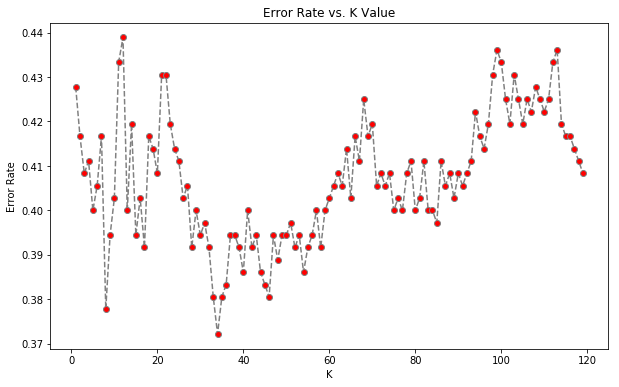

In [566]:
error_rate = []

for i in range(1,120):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,120),error_rate,color='gray', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=6)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Due to the unpredictability of this model on this particular set of data, there really is not an elbow but there is a noticeably low relative error rate for the K value 34. I then test the model using that K value.

In [567]:
knn_model = KNeighborsClassifier(n_neighbors=34)
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)
print(confusion_matrix(y_test, knn_pred))
print('\n')
print(classification_report(y_test, knn_pred))

[[107  80]
 [ 54 119]]


             precision    recall  f1-score   support

          0       0.66      0.57      0.61       187
          1       0.60      0.69      0.64       173

avg / total       0.63      0.63      0.63       360



The results are slightly better than the logistic regression but are still far from accurate, getting about 63% of the results correct.

## 3. Decision Tree and Random Forest Classifier

I speculated earlier that my taste depends on a combination of the audio features rather than being correlated to a specific feature. This is where a decision tree is likely to help because it splits the data based on certain scenarios, which in this case would be certain combinations of numerical values of the audio features.

### 3.1. Decision Tree

I first test the data using a single decision tree.

In [155]:
from sklearn.tree import DecisionTreeClassifier

In [557]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

dtree_model = DecisionTreeClassifier()
dtree_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [558]:
dtree_pred = dtree_model.predict(X_test)
print(confusion_matrix(y_test, dtree_pred))
print('\n')
print(classification_report(y_test, dtree_pred))

[[138  49]
 [ 65 108]]


             precision    recall  f1-score   support

          0       0.68      0.74      0.71       187
          1       0.69      0.62      0.65       173

avg / total       0.68      0.68      0.68       360



The results are only slightly better than the K-nearest-neighbor model but the recall rate of class 0 breaking the 70% mark is encouraging.

### 3.2. Random Forest Classifier

A single tree can only encompass so many scenarios, so having a random forest increases the number of possible scenarios which could significantly improve the success rate of the predictions.

In [559]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [560]:
from sklearn.ensemble import RandomForestClassifier
rfc_model = RandomForestClassifier()
rfc_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [547]:
rfc_pred = rfc_model.predict(X_test)
print(confusion_matrix(y_test, rfc_pred))
print('\n')
print(classification_report(y_test, rfc_pred))

[[100  13]
 [ 41  86]]


             precision    recall  f1-score   support

          0       0.71      0.88      0.79       113
          1       0.87      0.68      0.76       127

avg / total       0.79      0.78      0.77       240



As expected, the results do have a significant improvment. Most notably, when predicting if I like a song, the prediction is correct 87% of the time, and the model correctly predicted 88% of the songs that I don't like.

While the results aren't the most accurate, the model does well given the nature of the data available.

## 4. TensorFlow Estimator (Work in Progress)

I then attempted to train a TensorFlow Estimator with my data. This is not a very good implementation of an estimator with a very varied and unpredictable set of results each time the model is run. I will be looking for a better implementation that can provide reliable results using the same given data.

In [165]:
import tensorflow as tf

In [166]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [167]:
songs_scaled = scaler.fit_transform(songs.drop('class', axis=1))
songs_scaled_df = pd.DataFrame(data = songs_scaled, columns = songs.columns[:-1])
songs_scaled_df.head()

,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,num_bars,num_sections,num_segments
0,-0.746108,0.119761,0.751312,-0.598126,0.788105,-0.821372,-0.372044,-0.447152,0.238070,-0.396291,0.422383,0.140056,-0.061333,-0.426503,0.294402
1,0.672892,0.914846,-0.368877,0.708417,-1.268866,-0.066077,-0.371931,-0.872519,-1.193127,0.197487,0.053034,0.140056,0.125427,-0.807526,1.090669
2,-0.129440,-0.449448,-0.088830,-1.519601,-1.268866,1.966157,3.035131,-0.649057,-1.179709,-0.894090,-0.656409,0.140056,-0.995129,-0.426503,-0.327533
3,0.898341,0.770285,-1.489065,0.772893,-1.268866,-0.744221,-0.371664,-0.705821,1.682685,0.661065,0.275763,0.140056,0.605665,0.335542,0.723161
4,-0.069762,0.661864,1.591453,0.015296,-1.268866,-0.840900,-0.366320,1.385087,-0.580396,-0.695249,1.387571,0.140056,0.258826,-0.045481,1.740874


In [569]:
X = songs_scaled_df
y = songs['class']

In [570]:
danceability = tf.feature_column.numeric_column('danceability')
energy = tf.feature_column.numeric_column('energy')
key = tf.feature_column.numeric_column('key')
loudness = tf.feature_column.numeric_column('loudness')
mode = tf.feature_column.numeric_column('mode')
acousticness = tf.feature_column.numeric_column('acousticness')
instrumentalness = tf.feature_column.numeric_column('instrumentalness')
liveness = tf.feature_column.numeric_column('liveness')
valence = tf.feature_column.numeric_column('valence')
tempo = tf.feature_column.numeric_column('tempo')
duration_ms = tf.feature_column.numeric_column('duration_ms')
time_signature = tf.feature_column.numeric_column('time_signature')
num_bars = tf.feature_column.numeric_column('num_bars')
num_sections = tf.feature_column.numeric_column('num_sections')
num_segments = tf.feature_column.numeric_column('num_segments')

In [571]:
feat_cols = [danceability, energy, key, loudness, mode, acousticness, instrumentalness,
            liveness, valence, tempo, duration_ms, time_signature, num_bars, num_sections, num_segments]

In [753]:
classifier = tf.estimator.DNNClassifier(hidden_units=[1024,512,1024], n_classes=2, feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Simon\\AppData\\Local\\Temp\\tmp53ci8k1d', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002469768BF98>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [760]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
input_func = tf.estimator.inputs.pandas_input_fn(X_train, y_train, batch_size=16, shuffle=True)

In [761]:
classifier.train(input_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Simon\AppData\Local\Temp\tmp53ci8k1d\model.ckpt-53
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 53 into C:\Users\Simon\AppData\Local\Temp\tmp53ci8k1d\model.ckpt.
INFO:tensorflow:loss = 8.446995, step = 54
INFO:tensorflow:Saving checkpoints for 106 into C:\Users\Simon\AppData\Local\Temp\tmp53ci8k1d\model.ckpt.
INFO:tensorflow:Loss for final step: 2.1890898.


In [762]:
pred_fn = tf.estimator.inputs.pandas_input_fn(x=X_test, batch_size=len(X_test), shuffle=False)

In [763]:
predictions = list(classifier.predict(pred_fn))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Simon\AppData\Local\Temp\tmp53ci8k1d\model.ckpt-106
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [764]:
tf_pred = []
for pred in predictions:
    tf_pred.append(pred['class_ids'][0])

In [765]:
print(confusion_matrix(y_test, tf_pred))
print('\n')
print(classification_report(y_test, tf_pred))

[[154  37]
 [ 55 114]]


             precision    recall  f1-score   support

          0       0.74      0.81      0.77       191
          1       0.75      0.67      0.71       169

avg / total       0.75      0.74      0.74       360



The results above are about the average results I have obtained. I have gotten results as low as 0.65 and as high as 0.85 with the exact same model run at different times.